In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

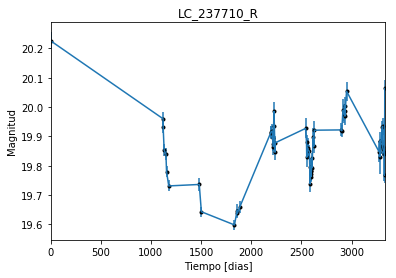

In [2]:
data = np.genfromtxt('LC_237710_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_237710_R')
plt.savefig("LC_237710_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

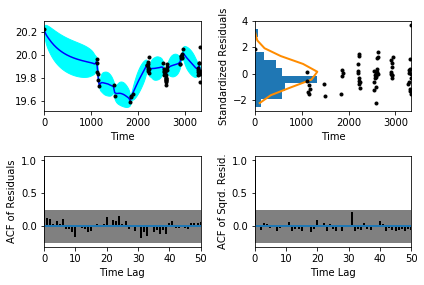

In [5]:
sample.assess_fit()

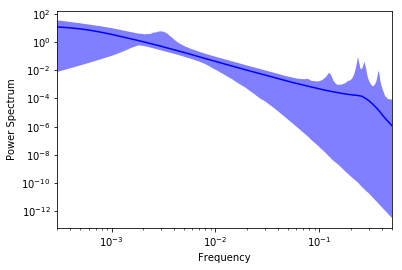

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

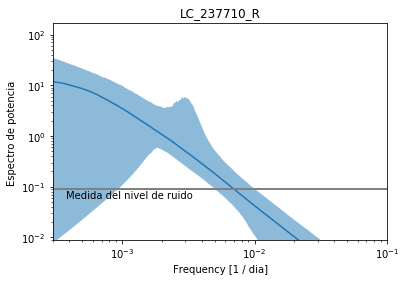

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_237710_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_237710_R')

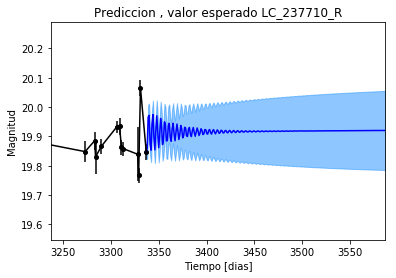

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_237710_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_237710_R')

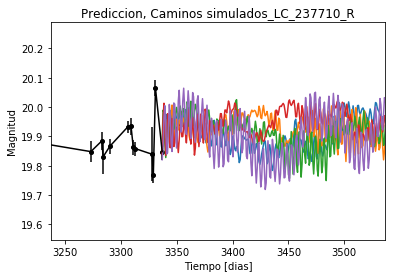

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_237710_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


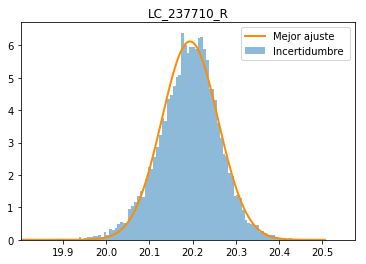

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_237710_R')
plt.savefig("Mejor_ajuste_LC_237710_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_237710_R')

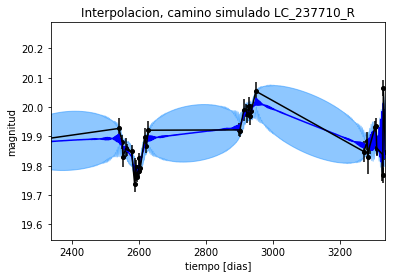

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_237710_R')

Text(0.5,1,'Interpolacion, camino simulado LC_237710_R')

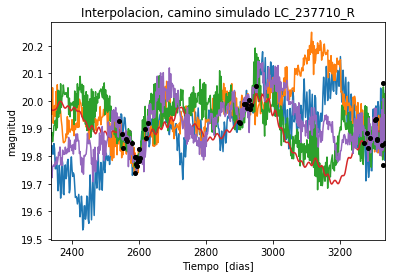

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_237710_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 687.978328216
Median: 0.00511577400711
Standard deviation: 0.0828079387461
68% credibility interval: [ 0.00154503  0.01319209]
95% credibility interval: [ 0.00042169  0.18784079]
99% credibility interval: [  3.27494343e-04   7.19217566e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1297.62044187
Median: 0.00469157427882
Standard deviation: 0.0229554330398
68% credibility interval: [ 0.00121112  0.01138344]
95% credibility interval: [ 0.00036904  0.03945479]
99% credibility interval: [ 0.0003165   0.14502585]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 401.097552787
Median: 0.145368585795
Standard deviation: 0.293655

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 127.888969837
Median: 110.405206088
Standard deviation: 3.15636196965
68% credibility interval: [ 105.7273184   112.71805194]
95% credibility interval: [ 102.9587012   113.84683066]
99% credibility interval: [ 100.91885742  114.40076983]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 333.345319672
Median: 1.18406979018
Standard deviation: 1.91566007581
68% credibility interval: [ 0.08601553  4.11144884]
95% credibility interval: [ 0.0325827   6.19773958]
99% credibility interval: [ 0.01914109  6.61506522]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 127.260179774
Median: 2.95716543988
Standard deviation: 10.0812270027
68% credibility interval: [  1.5412851   23.22206496]
95% credibility interval: [  2.45032959e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2969.06326485
Median: 2.67352789545e-07
Standard deviation: 1.35513372955e+96
68% credibility interval: [  1.88009996e-44   1.05400341e+12]
95% credibility interval: [  1.17579418e-84   9.38708898e+83]
99% credibility interval: [  1.09219674e-110   2.69831735e+084]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 712.248898912
Median: 19.8912439972
Standard deviation: 0.0758464416237
68% credibility interval: [ 19.82942789  19.96876815]
95% credibility interval: [ 19.76389608  20.06250931]
99% credibility interval: [ 19.69412744  20.12824619]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 138.90837498
Median: 0.263832748991
Standard deviation: 0.267432460904
68% credibility interval: [ 0.14034467  0.76625202]
95% credibility interval: [ 0.         0.8812427]
99% credibility interval: [ 0.          0.92843042]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 138.90837498
Median: 0.263832748991
Standard deviation: 0.267432460904
68% credibility interval: [ 0.14034467  0.76625202]
95% credibility interval: [ 0.         0.8812427]
99% credibility interval: [ 0.          0.92843042]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 75.9090094354
Median: 0.0
Standard deviation: 0.000655213155198
68% credibilit

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 127.888969837
Median: 110.405206088
Standard deviation: 3.15636196965
68% credibility interval: [ 105.7273184   112.71805194]
95% credibility interval: [ 102.9587012   113.84683066]
99% credibility interval: [ 100.91885742  114.40076983]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 360.634514423
Median: 0.0273124209774
Standard deviation: 0.0174621798187
68% credibility interval: [ 0.01818834  0.04187229]
95% credibility interval: [ 0.01336675  0.0692621 ]
99% credibility interval: [ 0.01135713  0.10745859]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 302.435947908
Median: 1.12407154557
Standard deviation: 0.324781299497
68% credibility interval: [ 0.88815933  1.58469812]
95% credibility interval: [ 0.72494308  1.91812258]
99% credibility interval: [ 0.6538313   1.98471667]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 291.99050793
Median: 0.0243417886446
Standard deviation: 0.315894462258
68% credibility interval: [  2.84439376e-15   1.84728336e-01]
95% credibility interval: [  3.53623957e-86   9.81630240e-01]
99% credibility interval: [  1.10796848e-86   2.20338232e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 687.978328216
Median: (-0.0321433560763-2.12980765674j)
Standard deviation: 1.75903690333
68% credibility interval: [-0.08288833-1.4795126j  -0.00970769-4.76433069j]
95% credibility interval: [-1.18023849+0.j         -0.00264955-5.52673049j]
99% credibility interval: [ -4.51897724e+00+0.j          -2.05770765e-03-1.46926284j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1297.62044187
Median: (-0.0294780305762+1.46445022874j)
Standard deviation: 1.68650657784
68% credibility interval: [-0.07152429+5.46519122j -0.00760966+1.47396268j]
95% credibility interval: [-0.24790174+1.81454605j -0.00231875+0.02186826j]
99% credibility interval: [-0.91122427+2.53896714j -0.00198865+0.j        ]
Posterior summary for parameter ar